In [45]:
# 鸟类数据分类

from keras.preprocessing.image import ImageDataGenerator

IMSIZE = 224
train_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/data_vgg/train',
                                                                           target_size=(IMSIZE, IMSIZE),
                                                                           batch_size=20,
                                                                           class_mode='categorical'
                                                                           )

validation_generator = ImageDataGenerator(rescale=1. / 255).flow_from_directory('../../data/data_vgg/test',
                                                                                target_size=(IMSIZE, IMSIZE),
                                                                                batch_size=20,
                                                                                class_mode='categorical'
                                                                                )

Found 45980 images belonging to 315 classes.
Found 1575 images belonging to 315 classes.


IndexError: index 10 is out of bounds for axis 0 with size 10

<Figure size 432x288 with 0 Axes>

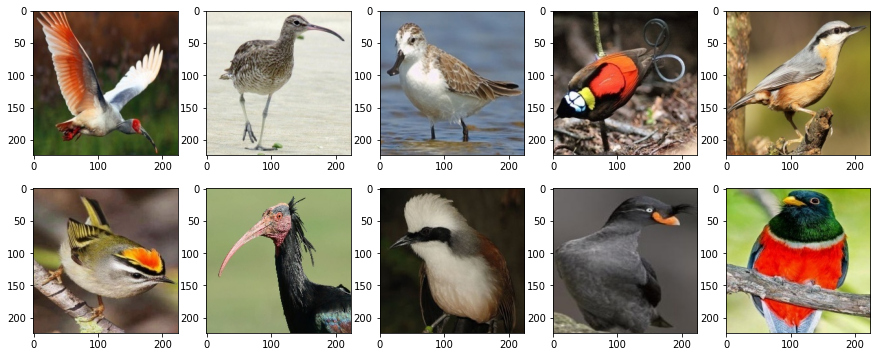

In [46]:
#图像显示
from matplotlib import pyplot as plt

plt.figure()
fig, ax = plt.subplots(2, 5)
fig.set_figheight(6)
fig.set_figwidth(15)
ax = ax.flatten()
X, Y = next(validation_generator)
for i in range(15): ax[i].imshow(X[i, :, :, ])

In [47]:
#VGG16实现
#VGG模型构建
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Input, Activation
from keras import Model
from keras.layers import GlobalAveragePooling2D

input_shape = (IMSIZE, IMSIZE, 3)
input_layer = Input(input_shape)
x = input_layer

x = Conv2D(64, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(64, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(128, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(128, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(256, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(256, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(256, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = Conv2D(512, [3, 3], padding="same", activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = GlobalAveragePooling2D()(x)

x = Dense(315)(x)
x = Activation('softmax')(x)
output_layer = x
model_vgg16 = Model(input_layer, output_layer)
model_vgg16.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_113 (Conv2D)          (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_114 (Conv2D)          (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 112, 112, 128)     147584    
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 112, 112, 128)     147

In [48]:
#vgg16模型的编译与拟合
from keras.optimizers import Adam

model_vgg16.compile(loss='categorical_crossentropy',
                    optimizer=Adam(lr=0.001),
                    metrics=['accuracy'])
model_vgg16.fit_generator(train_generator,
                          epochs=20,
                          validation_data=validation_generator)

Epoch 1/20


ResourceExhaustedError: OOM when allocating tensor with shape[25,512,14,14] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training_10/Adam/gradients/conv2d_126/convolution_grad/Conv2DBackpropInput}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
